In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
#kaynak https://www.veribilimiokulu.com/k-en-yakin-komsu-k-nearest-neighbor-siniflandirma-python-ornek-uygulama/

In [7]:
os.chdir('C:\\Users\\\muham\\OneDrive\\Masaüstü\\Yapay zeka örnekler\\Örnek-1')

In [9]:
dataset = pd.read_csv('dataset.csv')

In [10]:
dataset

,KullaniciID,Cinsiyet,Yas,TahminiMaas,SatinAldiMi
0,15624510,Erkek,19,19000,0
1,15810944,Erkek,35,20000,0
2,15668575,Kadın,26,43000,0
3,15603246,Kadın,27,57000,0
4,15804002,Erkek,19,76000,0
...,...,...,...,...,...
395,15691863,Kadın,46,41000,1
396,15706071,Erkek,51,23000,1
397,15654296,Kadın,50,20000,1
398,15755018,Erkek,36,33000,0


In [12]:
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, 4].values

In [14]:
#Veriyi Eğitim ve Test Olarak Ayırmak

#Veri setinde 400 kayıt var bunun 300’ünü eğitim, 100’ünü test için ayıralım.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)



In [15]:
#Feature Scaling öznitelik çıkarımı
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [16]:
#K En Yakın Komşu Modeli Oluşturmak ve Eğitmek
#Şimdi scikit-learn kütüphanesi neighbors modülü KNeighborClassifier sınıfından oluşturacağımız
#classifier nesnesi modelimiz oluşturalım.

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 2)
classifier.fit(X_train, y_train)


#Sınıf parametrelerinden biraz bahsedelim. n_neighbors kullanılacak komşu sayısı. 
#metric ise komşuların yakınlığını belirlemede hangi yöntemi kullanacağımız. 
#mesafeye dayalı yöntem kullanacak isek minkowski seçiyoruz. 
#p ise hangi mesafe yöntemini k kullanacağımız, 2 öklid mesafesini kullan demektir.

KNeighborsClassifier()

In [17]:
#Test Seti ile Tahmin Yapmak
#Ayırdığımız test setimizi (X_test) kullanarak oluşturduğumuz model ile tahmin yapalım  ve elde ettiğimiz set (y_pred) ile 
#hedef değişken (y_test) test setimizi karşılaştıralım.

y_pred = classifier.predict(X_test)

C:\Users\muham\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [18]:
y_pred  #modelimizin tahmini verisi

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [19]:
y_test  #gerçek veri

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [21]:
#Hata Matrisini Oluşturma
#Yaptığımız sınıflandırmanın doğruluğunu kontrol etme yöntemlerinden birisi de hata matrisi oluşturmaktır. 
#Hata matrisi için scikit-learn kütüphanesi metrics modülü confusion_matrix fonksiyonunu kullanıyoruz.

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[64,  4],
       [ 3, 29]], dtype=int64)

C:\Users\muham\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its 

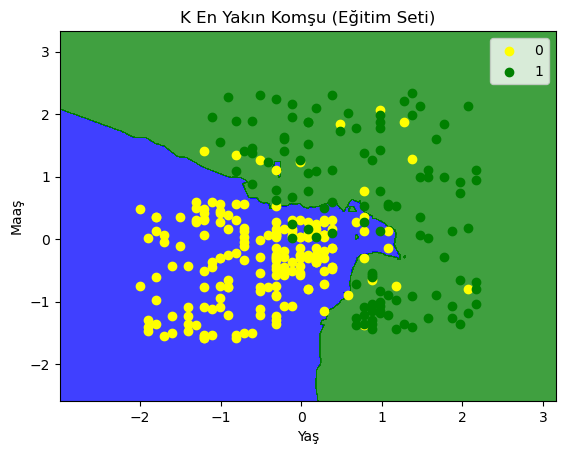

In [22]:
#Bildiğiniz gibi 100 kayıtlık test verisi ayırmıştık. 
#Yukarıda gördüğümüz hata matrisine göre 7 kayıt yanlış sınıflandırılmış, 93 kayıt doğru sınıflandırılmış
#Lojistik regresyonda yanlış sınıflandırma sayısı 11 idi. K en yakın komşu daha iyi iş çıkarmış görünüyor. Grafiğimizi görelim:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                 c = ListedColormap(('yellow', 'green'))(i), label = j)
plt.title('K En Yakın Komşu (Eğitim Seti)')
plt.xlabel('Yaş')
plt.ylabel('Maaş')
plt.legend()
plt.show()